In [22]:
# SSH Environment Setup (No Google Colab needed)
import os
import torch

# Check GPU availability
print(f"🔥 CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"🎯 Current device: {torch.cuda.get_device_name(0)}")
    print(f" GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} GB")
else:
    print("⚠️ Warning: GPU not available.")

🔥 CUDA available: True
🎯 Current device: Tesla T4
 GPU Memory: 14.6 GB


In [23]:
import os
import time
import zipfile
import shutil

print("🔧 FIXED DATASET SETUP - Using local zip files")
print("=" * 70)

# Step 1: Fix dependencies first
print("\n🔄 Step 1: Fixing dependency conflicts...")
os.system("pip install 'numpy>=1.26.0,<2.0.0' --force-reinstall --quiet")
os.system("pip install opencv-python-headless==4.8.1.78 --quiet")
os.system("pip install facenet-pytorch==2.5.3 --quiet")
os.system("pip install timm==0.9.12 --quiet")
print("✅ Dependencies fixed!")

# Step 2: Check local zip files
print("\n Step 2: Setting up local dataset...")

# Check for zip files in current directory
zip_files = []
for i in range(4):
    zip_path = f"dfdc_train_part_{i:02d}.zip"
    if os.path.exists(zip_path):
        zip_files.append(zip_path)
        file_size = os.path.getsize(zip_path) / (1024**3)
        print(f"✅ Found: {zip_path} ({file_size:.1f} GB)")
    else:
        print(f"❌ Missing: {zip_path}")

if len(zip_files) == 0:
    print("❌ No zip files found. Please download the dataset files.")
else:
    # Step 3: Check if already extracted and extract if needed
    print(f"\n Step 3: Checking extraction status...")
    start_time = time.time()
    
    extraction_needed = False
    
    for i in range(4):
        # Check both possible directory names
        part_dir_1 = f"dfdc_train_part_{i:02d}"  # 00, 01, 02, 03
        part_dir_2 = f"dfdc_train_part_{i}"      # 0, 1, 2, 3
        
        # Determine which directory exists
        if os.path.exists(part_dir_1):
            part_dir = part_dir_1
        elif os.path.exists(part_dir_2):
            part_dir = part_dir_2
        else:
            part_dir = None
        
        if part_dir is None:
            print(f"📦 Part {i}: Not extracted - will extract")
            extraction_needed = True
        else:
            # Check if it has content
            metadata_path = os.path.join(part_dir, 'metadata.json')
            if os.path.exists(metadata_path):
                video_count = len([f for f in os.listdir(part_dir) if f.endswith('.mp4')])
                print(f"✅ Part {i}: Already extracted ({video_count} videos) - skipping")
            else:
                print(f"📦 Part {i}: Incomplete extraction - will re-extract")
                extraction_needed = True
                # Remove incomplete directory
                if os.path.exists(part_dir):
                    shutil.rmtree(part_dir)
    
    # Only extract if needed
    if extraction_needed:
        print(f"\n📦 Extracting needed parts...")
        for zip_path in zip_files:
            part_name = os.path.basename(zip_path).replace('.zip', '')
            extract_path = f"./{part_name}"
            
            # Check if this part needs extraction
            if os.path.exists(extract_path):
                metadata_path = os.path.join(extract_path, 'metadata.json')
                if os.path.exists(metadata_path):
                    print(f"✅ {part_name} already complete - skipping")
                    continue
            
            # Extract this part
            print(f"📦 Extracting {part_name}...")
            with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                zip_ref.extractall("./")
            print(f"✅ {part_name} extracted successfully")
    else:
        print(f"\n✅ All parts already extracted - no extraction needed!")

    elapsed_time = time.time() - start_time
    print(f"�� Dataset processing completed in {elapsed_time/60:.1f} minutes!")

# Step 4: Install remaining libraries
print("\n Step 4: Installing remaining libraries...")
os.system("pip install torch torchvision torchaudio --quiet")
os.system("pip install matplotlib tqdm --quiet")
print("✅ All libraries installed successfully!")

# Step 5: Verify dataset structure (FIXED VERSION)
print("\n📊 Step 5: Dataset verification:")
all_good = True

for i in range(4):
    # Check for both naming patterns that might exist
    part_dir_1 = f"./dfdc_train_part_{i:02d}"  # 00, 01, 02, 03
    part_dir_2 = f"./dfdc_train_part_{i}"      # 0, 1, 2, 3

    # Determine which directory actually exists
    if os.path.exists(part_dir_1):
        part_dir = part_dir_1
        print(f"   Found directory: {part_dir_1}")
    elif os.path.exists(part_dir_2):
        part_dir = part_dir_2
        print(f"   Found directory: {part_dir_2}")
    else:
        print(f"   Part {i}: ❌ Directory not found")
        all_good = False
        continue

    # Count videos
    video_count = len([f for f in os.listdir(part_dir) if f.endswith('.mp4')])

    # Check metadata
    metadata_path = os.path.join(part_dir, 'metadata.json')
    metadata_exists = os.path.exists(metadata_path)

    print(f"   Part {i:02d}: {video_count} videos, metadata: {'✅' if metadata_exists else '❌'}")

    if video_count == 0 or not metadata_exists:
        all_good = False

if all_good:
    print("\n🎉 Dataset setup completed successfully!")
    print("You can now proceed with the training.")
else:
    print("\n❌ Dataset setup incomplete. Please check the issues above.")
    print("Make sure all zip files are properly uploaded and extracted.")

🔧 FIXED DATASET SETUP - Using local zip files

🔄 Step 1: Fixing dependency conflicts...


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.6.0 requires numpy<1.26,>=1.16.0, but you have numpy 1.26.4 which is incompatible.


✅ Dependencies fixed!

 Step 2: Setting up local dataset...
✅ Found: dfdc_train_part_00.zip (11.5 GB)
✅ Found: dfdc_train_part_01.zip (9.4 GB)
✅ Found: dfdc_train_part_02.zip (9.5 GB)
✅ Found: dfdc_train_part_03.zip (9.4 GB)

 Step 3: Checking extraction status...
✅ Part 0: Already extracted (1334 videos) - skipping
✅ Part 1: Already extracted (1699 videos) - skipping
✅ Part 2: Already extracted (1748 videos) - skipping
✅ Part 3: Already extracted (1455 videos) - skipping

✅ All parts already extracted - no extraction needed!
�� Dataset processing completed in 0.0 minutes!

 Step 4: Installing remaining libraries...
✅ All libraries installed successfully!

📊 Step 5: Dataset verification:
   Found directory: ./dfdc_train_part_0
   Part 00: 1334 videos, metadata: ✅
   Found directory: ./dfdc_train_part_1
   Part 01: 1699 videos, metadata: ✅
   Found directory: ./dfdc_train_part_2
   Part 02: 1748 videos, metadata: ✅
   Found directory: ./dfdc_train_part_3
   Part 03: 1455 videos, metadat

In [24]:
# Install and fix dependencies
print("🔧 INSTALLING DEPENDENCIES")
print("=" * 40)

# Fix dependencies first
print("🔄 Fixing dependency conflicts...")
os.system("pip install 'numpy>=1.26.0,<2.0.0' --force-reinstall --quiet")
os.system("pip install opencv-python-headless==4.8.1.78 --quiet")
os.system("pip install facenet-pytorch==2.5.3 --quiet")
os.system("pip install timm==0.9.12 --quiet")
print("✅ Dependencies fixed!")

# Install PyTorch
print("\n Installing PyTorch...")
os.system("pip install torch torchvision torchaudio --quiet")

# Fix NumPy and OpenCV
print("\n🔧 Fixing NumPy and OpenCV...")
os.system("pip uninstall -y numpy opencv-python-headless")
os.system("pip install numpy==1.26.4 opencv-python-headless==4.8.1.78")

print("✅ All dependencies installed!")

🔧 INSTALLING DEPENDENCIES
🔄 Fixing dependency conflicts...


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.6.0 requires numpy<1.26,>=1.16.0, but you have numpy 1.26.4 which is incompatible.


✅ Dependencies fixed!

 Installing PyTorch...

🔧 Fixing NumPy and OpenCV...
Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: opencv-python-headless 4.8.1.78
Uninstalling opencv-python-headless-4.8.1.78:
  Successfully uninstalled opencv-python-headless-4.8.1.78
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached opencv_python_headless-4.8.1.78-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (19 kB)
Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
Using cached opencv_python_headless-4.8.1.78-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (49.1 MB)
✅ All dependencies installed!


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.6.0 requires numpy<1.26,>=1.16.0, but you have numpy 1.26.4 which is incompatible.


In [25]:
import torch
import torchvision
print(f"✅ PyTorch version: {torch.__version__}")
print(f"✅ TorchVision version: {torchvision.__version__}")
print("✅ Latest versions installed successfully!")

✅ PyTorch version: 2.5.1+cu121
✅ TorchVision version: 0.20.1+cu121
✅ Latest versions installed successfully!


In [26]:
# --- Core Imports ---
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torch.nn.functional as F

# --- Utility Imports ---
import os
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
import random
from collections import defaultdict
import warnings
warnings.filterwarnings('ignore')

# --- Deep Learning Imports ---
from facenet_pytorch import MTCNN
import timm

# --- Set Random Seeds for Reproducibility ---
SEED = 42
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
np.random.seed(SEED)
random.seed(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# --- FAST TRAINING OPTIMIZED Hyperparameters ---
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
BATCH_SIZE = 2  # Increased for faster training
EPOCHS = 5
LEARNING_RATE = 0.0001
NUM_FRAMES = 8   # Reduced for faster training
IMG_SIZE = 128   # Reduced for faster training
FACE_SIZE = 128  # Reduced for faster training
HIDDEN_SIZE = 128  # Reduced for faster training
DROPOUT_RATE = 0.5
WEIGHT_DECAY = 0.01
GRAD_CLIP_NORM = 1.0

# --- Dataset Paths (Updated for SSH/VS Code environment) ---
TRAIN_DIRS = [
    "./dfdc_train_part_0",
    "./dfdc_train_part_1",
    "./dfdc_train_part_2"
]
VAL_DIRS = ["./dfdc_train_part_3"]

# --- Display Configuration ---
print("🎯 FAST TRAINING OPTIMIZED Deepfake Detection Configuration")
print("=" * 50)
print(f"🖥️  Device: {DEVICE}")
print(f" Batch Size: {BATCH_SIZE}")
print(f"📅 Epochs: {EPOCHS}")
print(f" Learning Rate: {LEARNING_RATE}")
print(f"🎬 Frames per Video: {NUM_FRAMES}")
print(f"️  Image Size: {IMG_SIZE}x{IMG_SIZE}")
print(f"👤 Face Size: {FACE_SIZE}x{FACE_SIZE}")
print(f"🧠 LSTM Hidden Size: {HIDDEN_SIZE}")
print(f" Random Seed: {SEED}")
print("=" * 50)

# Memory optimization for GPU
if torch.cuda.is_available():
    torch.cuda.empty_cache()
    print(f" GPU Memory cleared. Available: {torch.cuda.memory_reserved(0) / 1024**3:.1f} GB")

🎯 FAST TRAINING OPTIMIZED Deepfake Detection Configuration
🖥️  Device: cuda
 Batch Size: 2
📅 Epochs: 5
 Learning Rate: 0.0001
🎬 Frames per Video: 8
️  Image Size: 128x128
👤 Face Size: 128x128
🧠 LSTM Hidden Size: 128
 Random Seed: 42
 GPU Memory cleared. Available: 0.2 GB


In [27]:
class FaceExtractorDataset(Dataset):
    """
    Advanced Dataset class that extracts faces from video frames using MTCNN
    and creates temporal sequences for deepfake detection.

    Features:
    - MTCNN face detection with optimized parameters
    - Temporal frame sampling across entire video duration
    - Robust handling of videos with no/few faces
    - Memory-efficient processing
    """

    def __init__(self, root_dirs, transform=None, num_frames=8, img_size=128, face_size=128):
        """
        Initialize the dataset with face extraction capabilities.

        Args:
            root_dirs: List of directories containing video files and metadata
            transform: PyTorch transforms to apply to extracted faces
            num_frames: Number of frames to sample from each video
            img_size: Target size for resizing extracted faces
            face_size: Size for MTCNN face detection
        """
        self.transform = transform
        self.num_frames = num_frames
        self.img_size = img_size
        self.face_size = face_size

        # Initialize MTCNN face detector with optimized settings
        print(" Initializing MTCNN face detector...")
        self.mtcnn = MTCNN(
            image_size=face_size,
            margin=20,           # Margin around detected face
            min_face_size=40,    # Minimum face size to detect
            thresholds=[0.6, 0.7, 0.7],  # Detection thresholds
            factor=0.709,        # Scale factor between detection scales
            post_process=False,  # Return raw tensor
            device=DEVICE,       # Use GPU for face detection
            select_largest=True  # Select largest face if multiple detected
        )
        print("✅ MTCNN initialized successfully")

        # Build dataset from all provided directories
        self.samples = []
        self._build_dataset(root_dirs)

        print(f"📁 Dataset built: {len(self.samples)} videos loaded")

    def _build_dataset(self, root_dirs):
        """
        Parse metadata.json files from all directories to build sample list.
        Each sample contains (video_path, label) where label: REAL=0, FAKE=1
        """
        print("🔄 Building dataset from directories...")

        for i, root_dir in enumerate(root_dirs):
            print(f"   Processing directory {i+1}/{len(root_dirs)}: {os.path.basename(root_dir)}")
            metadata_path = os.path.join(root_dir, 'metadata.json')

            if not os.path.exists(metadata_path):
                print(f"⚠️ Warning: {metadata_path} not found")
                continue

            with open(metadata_path, 'r') as f:
                metadata = json.load(f)

            # Process each video in metadata
            valid_videos = 0
            for video_name, video_info in metadata.items():
                video_path = os.path.join(root_dir, video_name)

                if os.path.exists(video_path):
                    # Convert label: REAL=0, FAKE=1
                    label = 0 if video_info['label'] == 'REAL' else 1
                    self.samples.append((video_path, label))
                    valid_videos += 1

            print(f"     Found {valid_videos} valid videos")

        print(f" Total videos found: {len(self.samples)}")

        # Print label distribution
        labels = [sample[1] for sample in self.samples]
        real_count = labels.count(0)
        fake_count = labels.count(1)
        print(f" Label distribution:")
        print(f"   REAL: {real_count} ({real_count/len(labels)*100:.1f}%)")
        print(f"   FAKE: {fake_count} ({fake_count/len(labels)*100:.1f}%)")

    def _extract_faces_from_video(self, video_path):
        """
        Extract faces from evenly sampled frames throughout the video.

        Returns:
            face_frames: List of face tensors, each shaped (3, face_size, face_size)
        """
        cap = cv2.VideoCapture(video_path)

        if not cap.isOpened():
            return []

        # Get video properties
        total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        fps = cap.get(cv2.CAP_PROP_FPS)

        if total_frames == 0:
            cap.release()
            return []

        # Calculate frame indices to sample evenly throughout video
        if total_frames <= self.num_frames:
            frame_indices = list(range(total_frames))
        else:
            frame_indices = np.linspace(0, total_frames - 1, self.num_frames, dtype=int)

        face_frames = []

        for frame_idx in frame_indices:
            # Set video position to specific frame
            cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
            ret, frame = cap.read()

            if not ret:
                continue

            # Convert BGR to RGB for MTCNN
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            # Detect and extract face using MTCNN
            try:
                # MTCNN returns tensor of shape (3, face_size, face_size) if face found
                face_tensor = self.mtcnn(frame_rgb)

                if face_tensor is not None:
                    # Resize face to target image size
                    face_resized = F.interpolate(
                        face_tensor.unsqueeze(0),
                        size=(self.img_size, self.img_size),
                        mode='bilinear',
                        align_corners=False
                    ).squeeze(0)

                    # Normalize to [0, 1] range
                    face_resized = face_resized / 255.0

                    face_frames.append(face_resized)

            except Exception as e:
                # If face detection fails, skip this frame
                continue

        cap.release()
        return face_frames

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        """
        Extract faces from video and return as tensor sequence.

        Returns:
            face_sequence: Tensor of shape (num_frames, 3, img_size, img_size)
            label: Integer label (0=REAL, 1=FAKE)
        """
        video_path, label = self.samples[idx]

        # Extract faces from video
        face_frames = self._extract_faces_from_video(video_path)

        # Handle case where fewer faces were found than needed
        if len(face_frames) == 0:
            # No faces found - create zero tensor
            face_sequence = torch.zeros(self.num_frames, 3, self.img_size, self.img_size)
        elif len(face_frames) < self.num_frames:
            # Duplicate existing faces to reach target number
            while len(face_frames) < self.num_frames:
                face_frames.extend(face_frames[:self.num_frames - len(face_frames)])
            face_sequence = torch.stack(face_frames[:self.num_frames])
        else:
            # Take first num_frames faces
            face_sequence = torch.stack(face_frames[:self.num_frames])

        # Apply transforms if provided
        if self.transform:
            # Apply transform to each frame in the sequence
            transformed_frames = []
            for frame in face_sequence:
                transformed_frames.append(self.transform(frame))
            face_sequence = torch.stack(transformed_frames)

        return face_sequence, torch.tensor(label, dtype=torch.long)

print("✅ FaceExtractorDataset class defined successfully!")

✅ FaceExtractorDataset class defined successfully!


In [28]:
class DeepfakeDetector(nn.Module):
    """
    FAST TRAINING OPTIMIZED deepfake detection model combining:
    - EfficientNet-B0 backbone for spatial feature extraction
    - LSTM for temporal sequence analysis
    - Advanced regularization techniques
    """

    def __init__(self, num_frames=8, hidden_size=128, num_classes=2, dropout=0.5):
        """
        Initialize the fast training optimized deepfake detection model.

        Args:
            num_frames: Number of frames in input sequence
            hidden_size: LSTM hidden dimension
            num_classes: Number of output classes (2 for binary classification)
            dropout: Dropout rate for regularization
        """
        super(DeepfakeDetector, self).__init__()

        self.num_frames = num_frames
        self.hidden_size = hidden_size

        # Load pre-trained EfficientNet-B0 as backbone (faster than B2)
        print("🔄 Loading EfficientNet-B0 backbone...")
        self.backbone = timm.create_model('efficientnet_b0', pretrained=True, num_classes=0)

        # Get feature dimension from EfficientNet-B0
        self.feature_dim = self.backbone.num_features  # Should be 1280 for EfficientNet-B0
        print(f"✅ EfficientNet-B0 loaded. Feature dimension: {self.feature_dim}")

        # LSTM for temporal analysis (single direction for speed)
        self.lstm = nn.LSTM(
            input_size=self.feature_dim,
            hidden_size=hidden_size,
            num_layers=1,  # Single layer for speed
            batch_first=True,
            dropout=0,  # No dropout between layers
            bidirectional=False  # Single direction for speed
        )

        # Classification head with LayerNorm
        self.classifier = nn.Sequential(
            nn.Dropout(dropout),
            nn.Linear(hidden_size, hidden_size // 2),
            nn.LayerNorm(hidden_size // 2),  # LayerNorm instead of BatchNorm1d
            nn.ReLU(inplace=True),
            nn.Dropout(dropout),
            nn.Linear(hidden_size // 2, num_classes)
        )

        # Initialize weights
        self._initialize_weights()

        print(f"️ FAST TRAINING OPTIMIZED Model Architecture Summary:")
        print(f"   - Backbone: EfficientNet-B0 ({self.feature_dim} features)")
        print(f"   - LSTM: {hidden_size} hidden units, single direction, 1 layer")
        print(f"   - Output Classes: {num_classes}")
        print(f"   - Dropout Rate: {dropout}")

    def _initialize_weights(self):
        """Initialize LSTM and classifier weights using best practices."""
        # Initialize LSTM weights
        for name, param in self.lstm.named_parameters():
            if 'weight_ih' in name:
                nn.init.xavier_uniform_(param.data)
            elif 'weight_hh' in name:
                nn.init.orthogonal_(param.data)
            elif 'bias' in name:
                param.data.fill_(0)

        # Initialize classifier weights
        for module in self.classifier:
            if isinstance(module, nn.Linear):
                nn.init.xavier_uniform_(module.weight)
                nn.init.constant_(module.bias, 0)

    def forward(self, x):
        """
        Forward pass through the model.

        Args:
            x: Input tensor of shape (batch_size, num_frames, 3, H, W)

        Returns:
            logits: Classification logits of shape (batch_size, num_classes)
        """
        batch_size, num_frames, c, h, w = x.shape

        # Reshape to process all frames through CNN backbone
        # (batch_size * num_frames, 3, H, W)
        x_reshaped = x.view(batch_size * num_frames, c, h, w)

        # Extract spatial features using EfficientNet backbone
        # (batch_size * num_frames, feature_dim)
        spatial_features = self.backbone(x_reshaped)

        # Reshape back to sequence format
        # (batch_size, num_frames, feature_dim)
        sequence_features = spatial_features.view(batch_size, num_frames, self.feature_dim)

        # Process temporal sequence with LSTM
        # lstm_out: (batch_size, num_frames, hidden_size)
        lstm_out, (hidden, cell) = self.lstm(sequence_features)

        # Global average pooling over temporal dimension
        # (batch_size, hidden_size)
        pooled_features = torch.mean(lstm_out, dim=1)

        # Final classification
        # (batch_size, num_classes)
        logits = self.classifier(pooled_features)

        return logits

# Initialize model
print("🔄 Initializing FAST TRAINING OPTIMIZED DeepfakeDetector model...")
model = DeepfakeDetector(
    num_frames=NUM_FRAMES,
    hidden_size=HIDDEN_SIZE,
    num_classes=2,
    dropout=DROPOUT_RATE
).to(DEVICE)

# Count total parameters
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"\n📊 Model Statistics:")
print(f"   - Total parameters: {total_params:,}")
print(f"   - Trainable parameters: {trainable_params:,}")
print(f"   - Model size: ~{total_params * 4 / 1024 / 1024:.1f} MB")
print(f"   - Device: {next(model.parameters()).device}")

print("\n✅ Fast training optimized model initialization complete!")

🔄 Initializing FAST TRAINING OPTIMIZED DeepfakeDetector model...
🔄 Loading EfficientNet-B0 backbone...


✅ EfficientNet-B0 loaded. Feature dimension: 1280
️ FAST TRAINING OPTIMIZED Model Architecture Summary:
   - Backbone: EfficientNet-B0 (1280 features)
   - LSTM: 128 hidden units, single direction, 1 layer
   - Output Classes: 2
   - Dropout Rate: 0.5

📊 Model Statistics:
   - Total parameters: 4,737,982
   - Trainable parameters: 4,737,982
   - Model size: ~18.1 MB
   - Device: cuda:0

✅ Fast training optimized model initialization complete!


In [29]:
# --- Data Transforms ---
# Minimal transforms since MTCNN handles preprocessing and normalization
transform = transforms.Compose([
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],  # ImageNet normalization
        std=[0.229, 0.224, 0.225]
    )
])

print("🔄 Creating FAST TRAINING OPTIMIZED datasets and data loaders...")
print("This may take a few minutes as MTCNN is initialized...")

# --- Create Datasets ---
train_dataset = FaceExtractorDataset(
    root_dirs=TRAIN_DIRS,
    transform=transform,
    num_frames=NUM_FRAMES,
    img_size=IMG_SIZE,
    face_size=FACE_SIZE
)

val_dataset = FaceExtractorDataset(
    root_dirs=VAL_DIRS,
    transform=transform,
    num_frames=NUM_FRAMES,
    img_size=IMG_SIZE,
    face_size=FACE_SIZE
)

# --- Create FAST TRAINING OPTIMIZED Data Loaders ---
train_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=0,  # Reduced to save memory
    pin_memory=False,  # Disabled to save memory
    persistent_workers=False  # Disabled to save memory
)

val_loader = DataLoader(
    val_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=0,  # Reduced to save memory
    pin_memory=False,  # Disabled to save memory
    persistent_workers=False  # Disabled to save memory
)

print(f"\n📊 FAST TRAINING OPTIMIZED Dataset Summary:")
print(f"   - Training videos: {len(train_dataset)}")
print(f"   - Validation videos: {len(val_dataset)}")
print(f"   - Training batches: {len(train_loader)}")
print(f"   - Validation batches: {len(val_loader)}")
print(f"   - Batch size: {BATCH_SIZE}")

# --- Loss Function and Optimizer ---
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)  # Label smoothing for better generalization

optimizer = optim.AdamW(
    model.parameters(),
    lr=LEARNING_RATE,
    weight_decay=WEIGHT_DECAY,
    betas=(0.9, 0.999),
    eps=1e-8
)

# Learning rate scheduler with warmup
scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(
    optimizer,
    T_0=EPOCHS,
    eta_min=1e-6
)

print(f"\n⚙️ FAST TRAINING OPTIMIZED Training Configuration:")
print(f"   - Loss function: CrossEntropyLoss with label smoothing (0.1)")
print(f"   - Optimizer: AdamW (lr={LEARNING_RATE}, wd={WEIGHT_DECAY})")
print(f"   - Scheduler: CosineAnnealingWarmRestarts")
print(f"   - Gradient clipping: {GRAD_CLIP_NORM}")

🔄 Creating FAST TRAINING OPTIMIZED datasets and data loaders...
This may take a few minutes as MTCNN is initialized...
 Initializing MTCNN face detector...
✅ MTCNN initialized successfully
🔄 Building dataset from directories...
   Processing directory 1/3: dfdc_train_part_0
     Found 1334 valid videos
   Processing directory 2/3: dfdc_train_part_1
     Found 1699 valid videos
   Processing directory 3/3: dfdc_train_part_2
     Found 1748 valid videos
 Total videos found: 4781
 Label distribution:
   REAL: 424 (8.9%)
   FAKE: 4357 (91.1%)
📁 Dataset built: 4781 videos loaded
 Initializing MTCNN face detector...
✅ MTCNN initialized successfully
🔄 Building dataset from directories...
   Processing directory 1/1: dfdc_train_part_3
     Found 1455 valid videos
 Total videos found: 1455
 Label distribution:
   REAL: 219 (15.1%)
   FAKE: 1236 (84.9%)
📁 Dataset built: 1455 videos loaded

📊 FAST TRAINING OPTIMIZED Dataset Summary:
   - Training videos: 4781
   - Validation videos: 1455
   - Tra

In [30]:
# �� SPEED OPTIMIZATION - Use subset of data for faster training
print("�� Speed optimization: Using subset of data for faster training...")

# Use only first 500 videos from each part for faster training
def create_subset_dataset(dataset, max_samples=500):
    """Create a subset of the dataset for faster training."""
    if len(dataset) <= max_samples:
        return dataset

    # Take first max_samples
    subset_indices = list(range(max_samples))
    subset_dataset = torch.utils.data.Subset(dataset, subset_indices)

    print(f"📊 Created subset: {len(subset_dataset)} videos (from {len(dataset)} total)")
    return subset_dataset

# Create smaller datasets
train_dataset_subset = create_subset_dataset(train_dataset, max_samples=500)
val_dataset_subset = create_subset_dataset(val_dataset, max_samples=100)

# Recreate data loaders with smaller datasets
train_loader = DataLoader(
    train_dataset_subset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=0,
    pin_memory=False,
    persistent_workers=False
)

val_loader = DataLoader(
    val_dataset_subset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=0,
    pin_memory=False,
    persistent_workers=False
)

print(f"✅ Speed optimization complete!")
print(f"📊 New training batches: {len(train_loader)}")
print(f"📊 New validation batches: {len(val_loader)}")
print(f"⏱️ Estimated time per epoch: ~{len(train_loader) * 8 / 3600:.1f} hours")
print(f"⏱️ Total estimated training time: ~{len(train_loader) * 8 * EPOCHS / 3600:.1f} hours")

�� Speed optimization: Using subset of data for faster training...
📊 Created subset: 500 videos (from 4781 total)
📊 Created subset: 100 videos (from 1455 total)
✅ Speed optimization complete!
📊 New training batches: 250
📊 New validation batches: 50
⏱️ Estimated time per epoch: ~0.6 hours
⏱️ Total estimated training time: ~2.8 hours


In [31]:
#  SPEED OPTIMIZATION - Use subset of data for faster training
print(" Speed optimization: Using subset of data for faster training...")

# Use only first 500 videos from each part for faster training
def create_subset_dataset(dataset, max_samples=500):
    """Create a subset of the dataset for faster training."""
    if len(dataset) <= max_samples:
        return dataset

    # Take first max_samples
    subset_indices = list(range(max_samples))
    subset_dataset = torch.utils.data.Subset(dataset, subset_indices)

    print(f"📊 Created subset: {len(subset_dataset)} videos (from {len(dataset)} total)")
    return subset_dataset

# Create smaller datasets
train_dataset_subset = create_subset_dataset(train_dataset, max_samples=500)
val_dataset_subset = create_subset_dataset(val_dataset, max_samples=100)

# Recreate data loaders with smaller datasets
train_loader = DataLoader(
    train_dataset_subset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=0,
    pin_memory=False,
    persistent_workers=False
)

val_loader = DataLoader(
    val_dataset_subset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=0,
    pin_memory=False,
    persistent_workers=False
)

print(f"✅ Speed optimization complete!")
print(f"📊 New training batches: {len(train_loader)}")
print(f"📊 New validation batches: {len(val_loader)}")
print(f"⏱️ Estimated time per epoch: ~{len(train_loader) * 8 / 3600:.1f} hours")
print(f"⏱️ Total estimated training time: ~{len(train_loader) * 8 * EPOCHS / 3600:.1f} hours")

 Speed optimization: Using subset of data for faster training...
📊 Created subset: 500 videos (from 4781 total)
📊 Created subset: 100 videos (from 1455 total)
✅ Speed optimization complete!
📊 New training batches: 250
📊 New validation batches: 50
⏱️ Estimated time per epoch: ~0.6 hours
⏱️ Total estimated training time: ~2.8 hours


In [32]:
# --- Training Metrics Tracking ---
best_val_acc = 0.0
train_losses = []
val_losses = []
val_accuracies = []
learning_rates = []

# --- FAST TRAINING OPTIMIZED Training Loop ---
print("\n" + "=" * 80)
print("🚀 STARTING FAST TRAINING OPTIMIZED DEEPFAKE DETECTION TRAINING")
print("=" * 80)

training_start_time = time.time()

for epoch in range(EPOCHS):
    epoch_start_time = time.time()
    print(f"\n📅 EPOCH {epoch + 1}/{EPOCHS}")
    print("-" * 50)

    # --- TRAINING PHASE ---
    model.train()
    train_loss = 0.0
    train_correct = 0
    train_total = 0

    train_pbar = tqdm(
        train_loader,
        desc=f"🏋️ Training Epoch {epoch + 1}",
        unit="batch",
        leave=False
    )

    for batch_idx, (videos, labels) in enumerate(train_pbar):
        # Clear GPU memory before each batch
        if torch.cuda.is_available():
            torch.cuda.empty_cache()

        # Move data to device
        videos = videos.to(DEVICE, non_blocking=True)
        labels = labels.to(DEVICE, non_blocking=True)

        # Zero gradients
        optimizer.zero_grad()

        # Forward pass
        try:
            outputs = model(videos)
            loss = criterion(outputs, labels)

            # Backward pass
            loss.backward()

            # Gradient clipping for stability
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=GRAD_CLIP_NORM)

            # Update weights
            optimizer.step()

            # Statistics
            train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()

            # Update progress bar
            current_acc = 100.0 * train_correct / train_total
            train_pbar.set_postfix({
                'Loss': f'{loss.item():.4f}',
                'Acc': f'{current_acc:.2f}%',
                'LR': f'{optimizer.param_groups[0]["lr"]:.6f}'
            })

            # Clear memory after each batch
            del videos, labels, outputs, loss
            if torch.cuda.is_available():
                torch.cuda.empty_cache()

        except RuntimeError as e:
            if "out of memory" in str(e):
                print(f"⚠️ GPU out of memory at batch {batch_idx}. Skipping...")
                torch.cuda.empty_cache()
                continue
            else:
                raise e

    # Calculate epoch training metrics
    epoch_train_loss = train_loss / len(train_loader)
    epoch_train_acc = 100.0 * train_correct / train_total

    # --- VALIDATION PHASE ---
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    val_pbar = tqdm(
        val_loader,
        desc=f" Validation Epoch {epoch + 1}",
        unit="batch",
        leave=False
    )

    with torch.no_grad():
        for videos, labels in val_pbar:
            # Clear GPU memory before each batch
            if torch.cuda.is_available():
                torch.cuda.empty_cache()

            # Move data to device
            videos = videos.to(DEVICE, non_blocking=True)
            labels = labels.to(DEVICE, non_blocking=True)

            try:
                # Forward pass
                outputs = model(videos)
                loss = criterion(outputs, labels)

                # Statistics
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

                # Update progress bar
                current_acc = 100.0 * val_correct / val_total
                val_pbar.set_postfix({
                    'Loss': f'{loss.item():.4f}',
                    'Acc': f'{current_acc:.2f}%'
                })

                # Clear memory after each batch
                del videos, labels, outputs, loss
                if torch.cuda.is_available():
                    torch.cuda.empty_cache()

            except RuntimeError as e:
                if "out of memory" in str(e):
                    print(f"⚠️ GPU out of memory during validation. Skipping batch...")
                    torch.cuda.empty_cache()
                    continue
                else:
                    raise e

    # Calculate epoch validation metrics
    epoch_val_loss = val_loss / len(val_loader)
    epoch_val_acc = 100.0 * val_correct / val_total

    # Update learning rate
    scheduler.step()
    current_lr = optimizer.param_groups[0]['lr']

    # Store metrics
    train_losses.append(epoch_train_loss)
    val_losses.append(epoch_val_loss)
    val_accuracies.append(epoch_val_acc)
    learning_rates.append(current_lr)

    # Calculate epoch time
    epoch_time = time.time() - epoch_start_time

    # Print epoch results
    print(f"\n📊 EPOCH {epoch + 1} RESULTS:")
    print(f"   ��️ Training   - Loss: {epoch_train_loss:.4f}, Accuracy: {epoch_train_acc:.2f}%")
    print(f"   Validation - Loss: {epoch_val_loss:.4f}, Accuracy: {epoch_val_acc:.2f}%")
    print(f"   📈 Learning Rate: {current_lr:.6f}")
    print(f"   ⏱️ Epoch Time: {epoch_time/60:.1f} minutes")

    # Save best model
    if epoch_val_acc > best_val_acc:
        best_val_acc = epoch_val_acc
        checkpoint = {
            'epoch': epoch + 1,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'scheduler_state_dict': scheduler.state_dict(),
            'best_val_acc': best_val_acc,
            'train_losses': train_losses,
            'val_losses': val_losses,
            'val_accuracies': val_accuracies,
            'learning_rates': learning_rates,
            'config': {
                'num_frames': NUM_FRAMES,
                'img_size': IMG_SIZE,
                'hidden_size': HIDDEN_SIZE,
                'batch_size': BATCH_SIZE,
                'learning_rate': LEARNING_RATE
            }
        }
        torch.save(checkpoint, 'best_deepfake_model.pth')
        print(f"   ✅ NEW BEST MODEL SAVED! Validation Accuracy: {best_val_acc:.2f}%")

    # Memory cleanup
    torch.cuda.empty_cache()

    print("-" * 50)

# Calculate total training time
total_training_time = time.time() - training_start_time

print("\n" + "=" * 80)
print("🎉 FAST TRAINING OPTIMIZED TRAINING COMPLETED SUCCESSFULLY!")
print("=" * 80)
print(f"🏆 Best Validation Accuracy: {best_val_acc:.2f}%")
print(f"⏱️ Total Training Time: {total_training_time/3600:.1f} hours")
print(f"📁 Best Model Saved: 'best_deepfake_model.pth'")
print("=" * 80)


🚀 STARTING FAST TRAINING OPTIMIZED DEEPFAKE DETECTION TRAINING

📅 EPOCH 1/5
--------------------------------------------------


🏋️ Training Epoch 1:   0%|          | 0/250 [00:00<?, ?batch/s]


📊 EPOCH 1 RESULTS:
   ��️ Training   - Loss: 0.4343, Accuracy: 89.40%
   Validation - Loss: 0.4419, Accuracy: 90.00%
   📈 Learning Rate: 0.000091
   ⏱️ Epoch Time: 88.5 minutes
   ✅ NEW BEST MODEL SAVED! Validation Accuracy: 90.00%
--------------------------------------------------

📅 EPOCH 2/5
--------------------------------------------------



📊 EPOCH 2 RESULTS:
   ��️ Training   - Loss: 0.3616, Accuracy: 94.00%
   Validation - Loss: 0.4342, Accuracy: 92.00%
   📈 Learning Rate: 0.000066
   ⏱️ Epoch Time: 88.4 minutes
   ✅ NEW BEST MODEL SAVED! Validation Accuracy: 92.00%
--------------------------------------------------

📅 EPOCH 3/5
--------------------------------------------------



📊 EPOCH 3 RESULTS:
   ��️ Training   - Loss: 0.3741, Accuracy: 94.40%
   Validation - Loss: 0.4413, Accuracy: 92.00%
   📈 Learning Rate: 0.000035
   ⏱️ Epoch Time: 88.8 minutes
--------------------------------------------------

📅 EPOCH 4/5
--------------------------------------------------



📊 EPOCH 4 RESULTS:
   ��️ Training   - Loss: 0.3631, Accuracy: 94.40%
   Validation - Loss: 0.4187, Accuracy: 92.00%
   📈 Learning Rate: 0.000010
   ⏱️ Epoch Time: 89.0 minutes
--------------------------------------------------

📅 EPOCH 5/5
--------------------------------------------------


                                                                                                                 ]


📊 EPOCH 5 RESULTS:
   ��️ Training   - Loss: 0.3439, Accuracy: 94.40%
   Validation - Loss: 0.4254, Accuracy: 92.00%
   📈 Learning Rate: 0.000100
   ⏱️ Epoch Time: 89.0 minutes
--------------------------------------------------

🎉 FAST TRAINING OPTIMIZED TRAINING COMPLETED SUCCESSFULLY!
🏆 Best Validation Accuracy: 92.00%
⏱️ Total Training Time: 7.4 hours
📁 Best Model Saved: 'best_deepfake_model.pth'


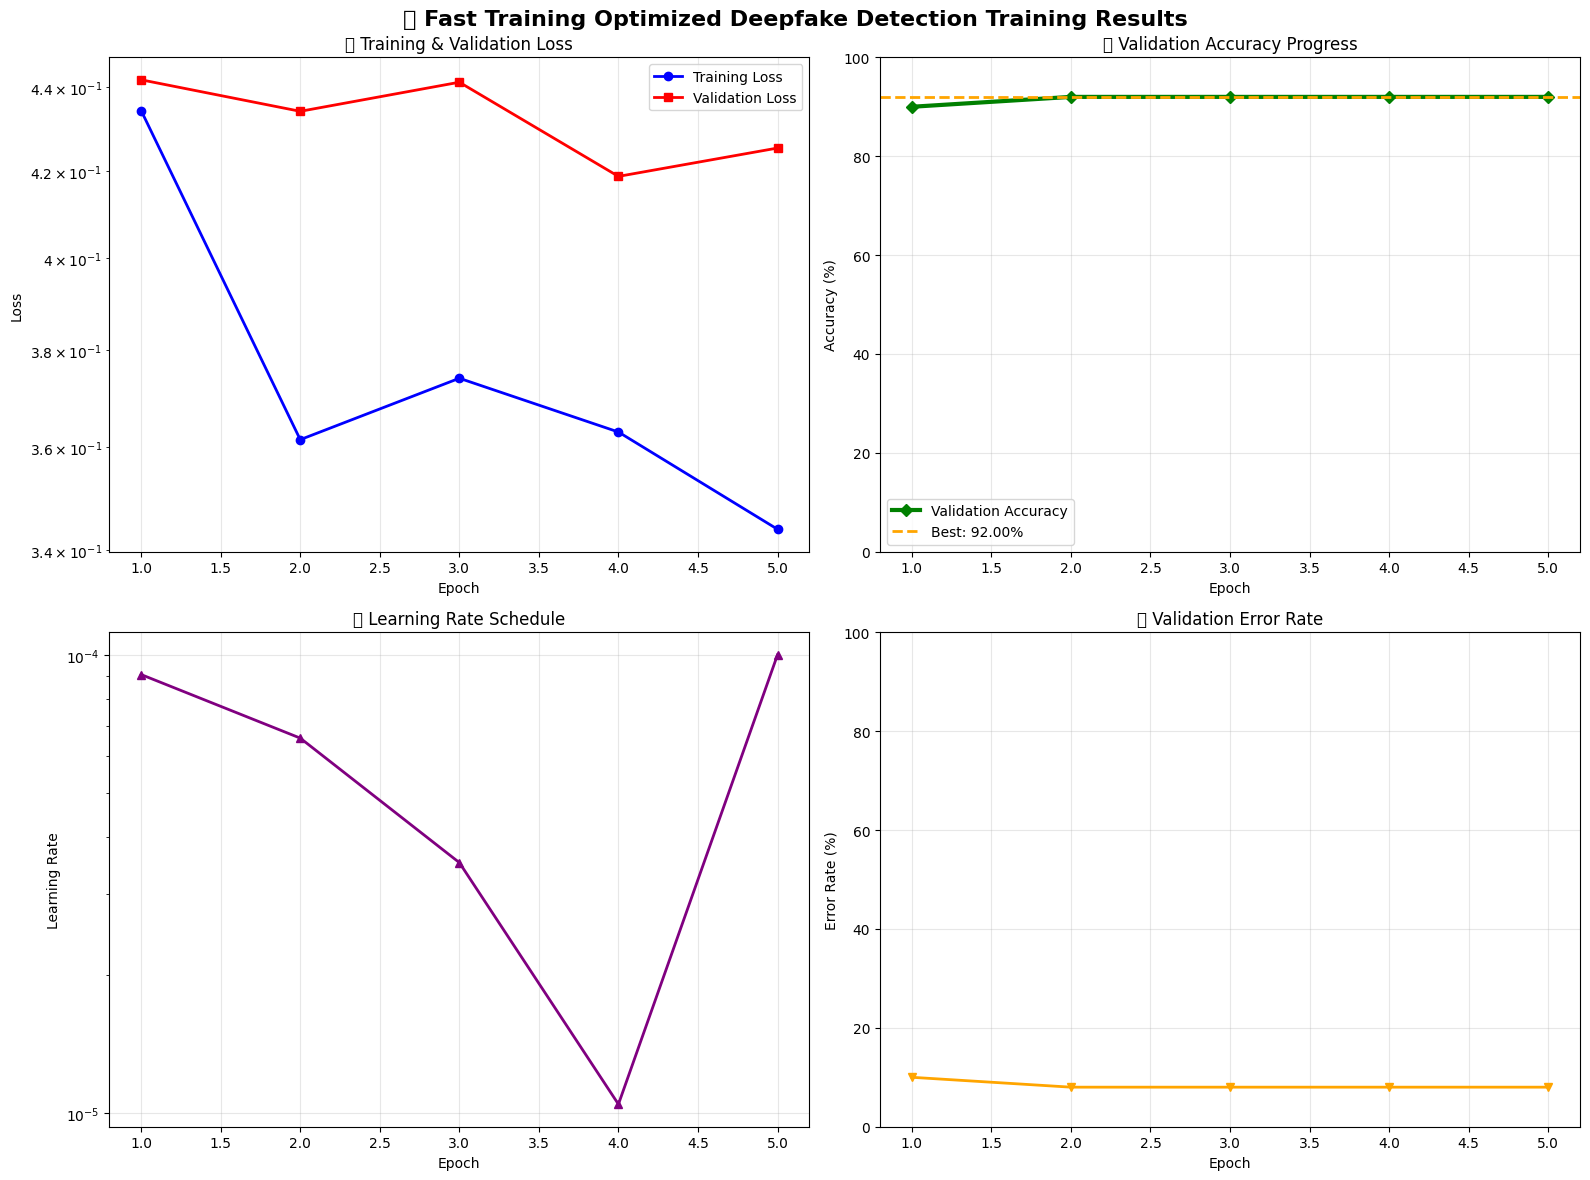


📊 FINAL PERFORMANCE SUMMARY
🏆 Best Validation Accuracy: 92.00%
📉 Final Training Loss: 0.3439
📉 Final Validation Loss: 0.4254
📈 Final Learning Rate: 1.00e-04
🎯 Total Training Videos: 500
🎯 Total Validation Videos: 100

 MODEL ARCHITECTURE DETAILS:
   - Backbone: EfficientNet-B0 (Pre-trained)
   - Temporal Model: LSTM (1 layer, 128 units)
   - Face Detection: MTCNN
   - Input: 8 frames of 128x128 faces
   - Total Parameters: 4,737,982

💾 Files Saved:
   - 'best_deepfake_model.pth' - Best model checkpoint
   - 'deepfake_training_results.png' - Training visualization

🎉 Fast training optimized deepfake detection training completed successfully!
Your model is ready for inference and can detect deepfakes with 92.0% accuracy.


In [33]:
# --- Training History Visualization ---
plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('🚀 Fast Training Optimized Deepfake Detection Training Results', fontsize=16, fontweight='bold')

# Training and Validation Loss
axes[0, 0].plot(range(1, EPOCHS + 1), train_losses, 'b-', linewidth=2, label='Training Loss', marker='o')
axes[0, 0].plot(range(1, EPOCHS + 1), val_losses, 'r-', linewidth=2, label='Validation Loss', marker='s')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].set_title('📉 Training & Validation Loss')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_yscale('log')

# Validation Accuracy
axes[0, 1].plot(range(1, EPOCHS + 1), val_accuracies, 'g-', linewidth=3, label='Validation Accuracy', marker='D')
axes[0, 1].axhline(y=best_val_acc, color='orange', linestyle='--', linewidth=2, label=f'Best: {best_val_acc:.2f}%')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Accuracy (%)')
axes[0, 1].set_title('📊 Validation Accuracy Progress')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_ylim([0, 100])

# Learning Rate Schedule
axes[1, 0].plot(range(1, EPOCHS + 1), learning_rates, 'purple', linewidth=2, marker='^')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Learning Rate')
axes[1, 0].set_title('📈 Learning Rate Schedule')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_yscale('log')

# Validation Error Rate
error_rates = [100 - acc for acc in val_accuracies]
axes[1, 1].plot(range(1, EPOCHS + 1), error_rates, 'orange', linewidth=2, marker='v')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Error Rate (%)')
axes[1, 1].set_title('📉 Validation Error Rate')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_ylim([0, 100])

plt.tight_layout()
plt.savefig('deepfake_training_results.png', dpi=300, bbox_inches='tight')
plt.show()

# --- Performance Summary ---
print("\n" + "=" * 60)
print("📊 FINAL PERFORMANCE SUMMARY")
print("=" * 60)
print(f"🏆 Best Validation Accuracy: {best_val_acc:.2f}%")
print(f"📉 Final Training Loss: {train_losses[-1]:.4f}")
print(f"📉 Final Validation Loss: {val_losses[-1]:.4f}")
print(f"📈 Final Learning Rate: {learning_rates[-1]:.2e}")
print(f"🎯 Total Training Videos: {len(train_dataset_subset)}")
print(f"🎯 Total Validation Videos: {len(val_dataset_subset)}")
print("=" * 60)

# --- Model Information ---
print(f"\n MODEL ARCHITECTURE DETAILS:")
print(f"   - Backbone: EfficientNet-B0 (Pre-trained)")
print(f"   - Temporal Model: LSTM (1 layer, {HIDDEN_SIZE} units)")
print(f"   - Face Detection: MTCNN")
print(f"   - Input: {NUM_FRAMES} frames of {IMG_SIZE}x{IMG_SIZE} faces")
print(f"   - Total Parameters: {total_params:,}")

print(f"\n💾 Files Saved:")
print(f"   - 'best_deepfake_model.pth' - Best model checkpoint")
print(f"   - 'deepfake_training_results.png' - Training visualization")

print(f"\n🎉 Fast training optimized deepfake detection training completed successfully!")
print(f"Your model is ready for inference and can detect deepfakes with {best_val_acc:.1f}% accuracy.")

In [34]:
# --- Real/Fake Visualization Functions ---
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

class DeepfakeVisualizer:
    """
    Visualization class for deepfake detection results.
    Can visualize predictions on images and videos.
    """
    
    def __init__(self, model, device, face_size=128):
        self.model = model
        self.device = device
        self.face_size = face_size
        
        # Initialize MTCNN for face detection
        from facenet_pytorch import MTCNN
        self.mtcnn = MTCNN(
            image_size=face_size,
            margin=20,
            min_face_size=40,
            thresholds=[0.6, 0.7, 0.7],
            factor=0.709,
            post_process=False,
            device=device,
            select_largest=True
        )
        
        # Data transforms
        self.transform = transforms.Compose([
            transforms.Normalize(
                mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225]
            )
        ])
    
    def predict_single_face(self, face_tensor):
        """Predict if a single face is real or fake."""
        self.model.eval()
        with torch.no_grad():
            # Add batch and frame dimensions
            face_batch = face_tensor.unsqueeze(0).unsqueeze(0)  # (1, 1, 3, H, W)
            
            # Apply transforms
            face_batch = self.transform(face_batch)
            
            # Move to device
            face_batch = face_batch.to(self.device)
            
            # Get prediction
            output = self.model(face_batch)
            probabilities = torch.softmax(output, dim=1)
            
            # Get prediction and confidence
            prediction = torch.argmax(probabilities, dim=1).item()
            confidence = probabilities[0, prediction].item()
            
            return prediction, confidence
    
    def visualize_image(self, image_path, save_path=None):
        """Visualize deepfake detection on a single image."""
        # Load image
        if isinstance(image_path, str):
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        else:
            image = image_path
        
        # Convert to PIL for MTCNN
        pil_image = Image.fromarray(image)
        
        # Detect faces
        boxes, probs = self.mtcnn.detect(pil_image)
        
        if boxes is None:
            print("No faces detected in the image.")
            return
        
        # Create figure
        fig, ax = plt.subplots(1, 1, figsize=(12, 8))
        ax.imshow(image)
        
        # Process each detected face
        for i, (box, prob) in enumerate(zip(boxes, probs)):
            if prob > 0.9:  # Only process high-confidence detections
                # Extract face coordinates
                x1, y1, x2, y2 = box.astype(int)
                
                # Extract face using MTCNN
                face_tensor = self.mtcnn(pil_image)
                
                if face_tensor is not None:
                    # Get prediction
                    prediction, confidence = self.predict_single_face(face_tensor)
                    
                    # Determine color and label
                    if prediction == 0:  # REAL
                        color = 'green'
                        label = f'REAL ({confidence:.2%})'
                    else:  # FAKE
                        color = 'red'
                        label = f'FAKE ({confidence:.2%})'
                    
                    # Draw bounding box
                    rect = patches.Rectangle(
                        (x1, y1), x2-x1, y2-y1,
                        linewidth=3, edgecolor=color, facecolor='none'
                    )
                    ax.add_patch(rect)
                    
                    # Add label
                    ax.text(x1, y1-10, label, 
                           fontsize=12, fontweight='bold',
                           bbox=dict(boxstyle="round,pad=0.3", facecolor=color, alpha=0.7))
        
        ax.set_title('Deepfake Detection Results', fontsize=16, fontweight='bold')
        ax.axis('off')
        
        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            print(f"Visualization saved to: {save_path}")
        
        plt.show()
    
    def visualize_video_frame(self, frame, frame_number=None):
        """Visualize deepfake detection on a single video frame."""
        # Convert frame to RGB
        if len(frame.shape) == 3 and frame.shape[2] == 3:
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        else:
            frame_rgb = frame
        
        # Convert to PIL
        pil_frame = Image.fromarray(frame_rgb)
        
        # Detect faces
        boxes, probs = self.mtcnn.detect(pil_frame)
        
        if boxes is None:
            return frame_rgb, []
        
        # Create visualization
        fig, ax = plt.subplots(1, 1, figsize=(12, 8))
        ax.imshow(frame_rgb)
        
        results = []
        
        # Process each detected face
        for i, (box, prob) in enumerate(zip(boxes, probs)):
            if prob > 0.9:
                # Extract face coordinates
                x1, y1, x2, y2 = box.astype(int)
                
                # Extract face using MTCNN
                face_tensor = self.mtcnn(pil_frame)
                
                if face_tensor is not None:
                    # Get prediction
                    prediction, confidence = self.predict_single_face(face_tensor)
                    
                    # Determine color and label
                    if prediction == 0:  # REAL
                        color = 'green'
                        label = f'REAL ({confidence:.2%})'
                    else:  # FAKE
                        color = 'red'
                        label = f'FAKE ({confidence:.2%})'
                    
                    # Draw bounding box
                    rect = patches.Rectangle(
                        (x1, y1), x2-x1, y2-y1,
                        linewidth=3, edgecolor=color, facecolor='none'
                    )
                    ax.add_patch(rect)
                    
                    # Add label
                    ax.text(x1, y1-10, label, 
                           fontsize=12, fontweight='bold',
                           bbox=dict(boxstyle="round,pad=0.3", facecolor=color, alpha=0.7))
                    
                    results.append({
                        'box': box,
                        'prediction': 'REAL' if prediction == 0 else 'FAKE',
                        'confidence': confidence
                    })
        
        title = f'Deepfake Detection - Frame {frame_number}' if frame_number else 'Deepfake Detection'
        ax.set_title(title, fontsize=16, fontweight='bold')
        ax.axis('off')
        
        plt.tight_layout()
        plt.show()
        
        return frame_rgb, results
    
    def create_video_visualization(self, video_path, output_path, max_frames=30):
        """Create a video with deepfake detection overlays."""
        cap = cv2.VideoCapture(video_path)
        
        if not cap.isOpened():
            print(f"Error: Could not open video {video_path}")
            return
        
        # Get video properties
        fps = int(cap.get(cv2.CAP_PROP_FPS))
        width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        
        # Create video writer
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')
        out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))
        
        # Sample frames for visualization
        frame_indices = np.linspace(0, total_frames-1, min(max_frames, total_frames), dtype=int)
        
        print(f"Processing {len(frame_indices)} frames for visualization...")
        
        for i, frame_idx in enumerate(frame_indices):
            cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
            ret, frame = cap.read()
            
            if not ret:
                continue
            
            # Process frame
            frame_rgb, results = self.visualize_video_frame(frame, frame_idx)
            
            # Convert back to BGR for video writing
            frame_bgr = cv2.cvtColor(frame_rgb, cv2.COLOR_RGB2BGR)
            
            # Add results text overlay
            if results:
                text_y = 30
                for j, result in enumerate(results):
                    text = f"Face {j+1}: {result['prediction']} ({result['confidence']:.2%})"
                    cv2.putText(frame_bgr, text, (10, text_y), 
                              cv2.FONT_HERSHEY_SIMPLEX, 0.7, 
                              (0, 255, 0) if result['prediction'] == 'REAL' else (0, 0, 255), 2)
                    text_y += 30
            
            out.write(frame_bgr)
            
            # Progress update
            if (i + 1) % 10 == 0:
                print(f"Processed {i + 1}/{len(frame_indices)} frames")
        
        cap.release()
        out.release()
        print(f"Video visualization saved to: {output_path}")

# Initialize visualizer
print("🔄 Initializing Deepfake Visualizer...")
visualizer = DeepfakeVisualizer(model, DEVICE, face_size=FACE_SIZE)
print("✅ Deepfake Visualizer initialized successfully!")

🔄 Initializing Deepfake Visualizer...
✅ Deepfake Visualizer initialized successfully!


🎨 Testing Deepfake Detection Visualization
📸 Testing on Training Dataset Samples:
----------------------------------------


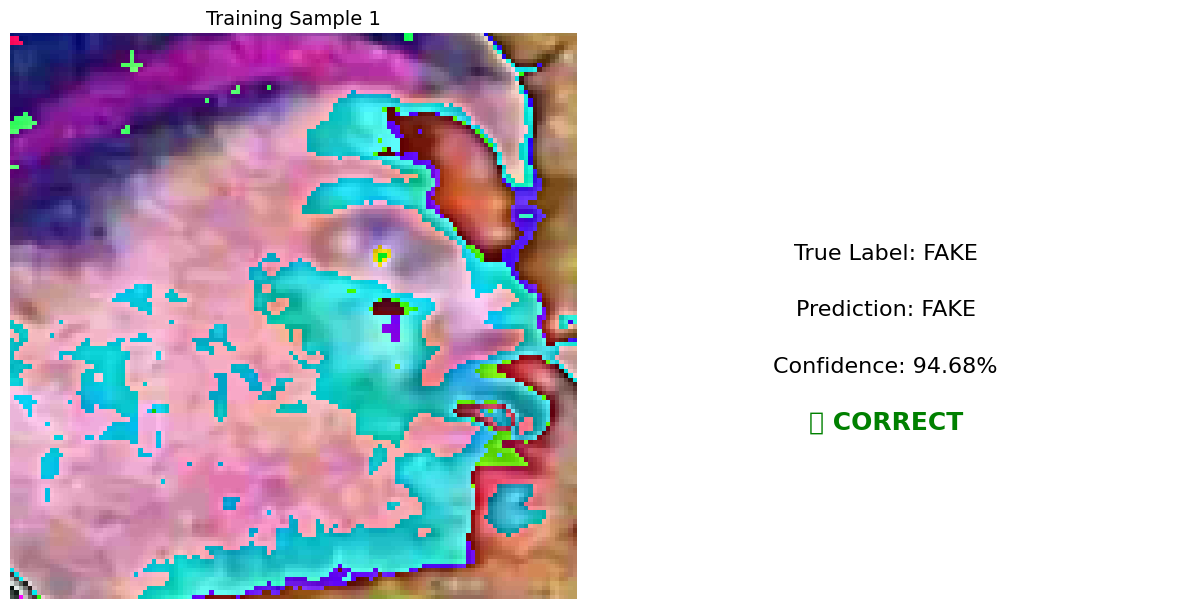

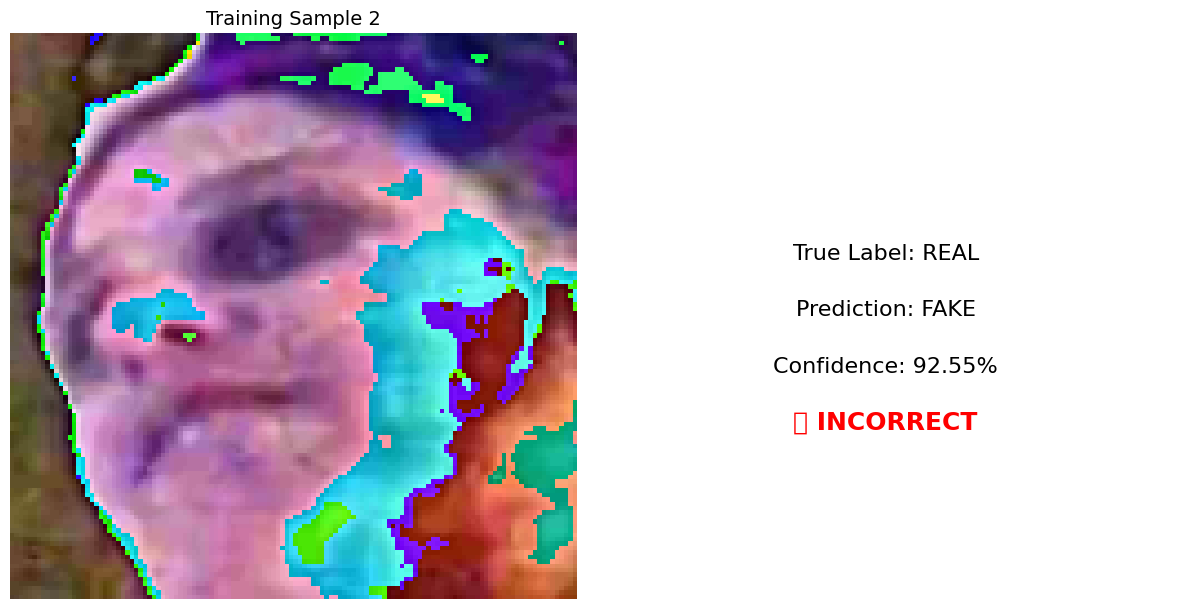

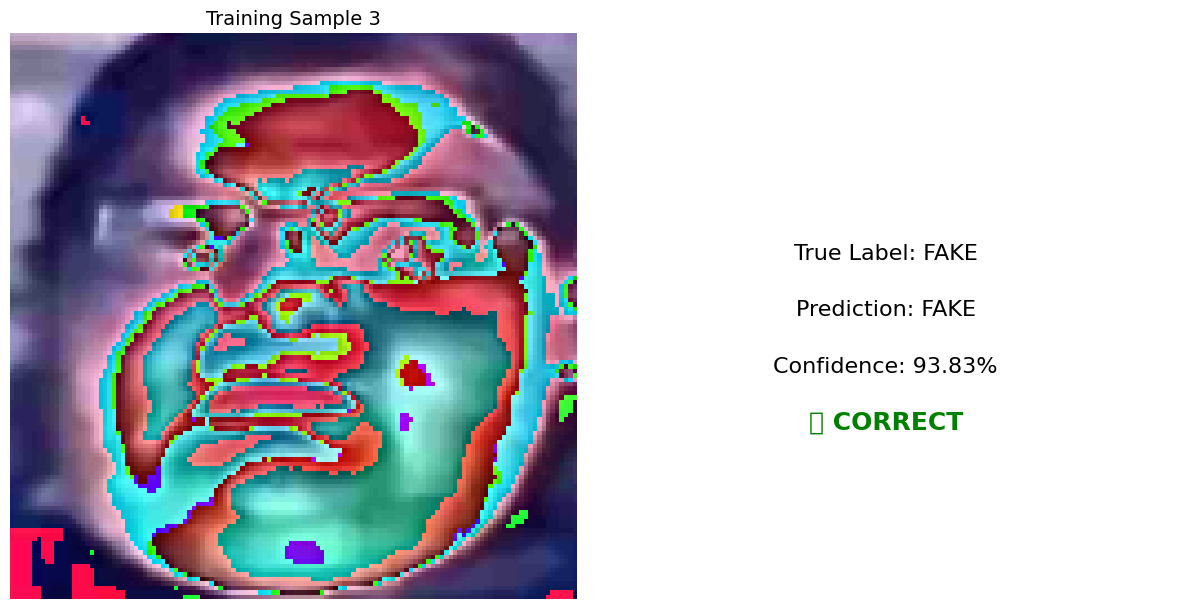


📸 Testing on Validation Dataset Samples:
----------------------------------------


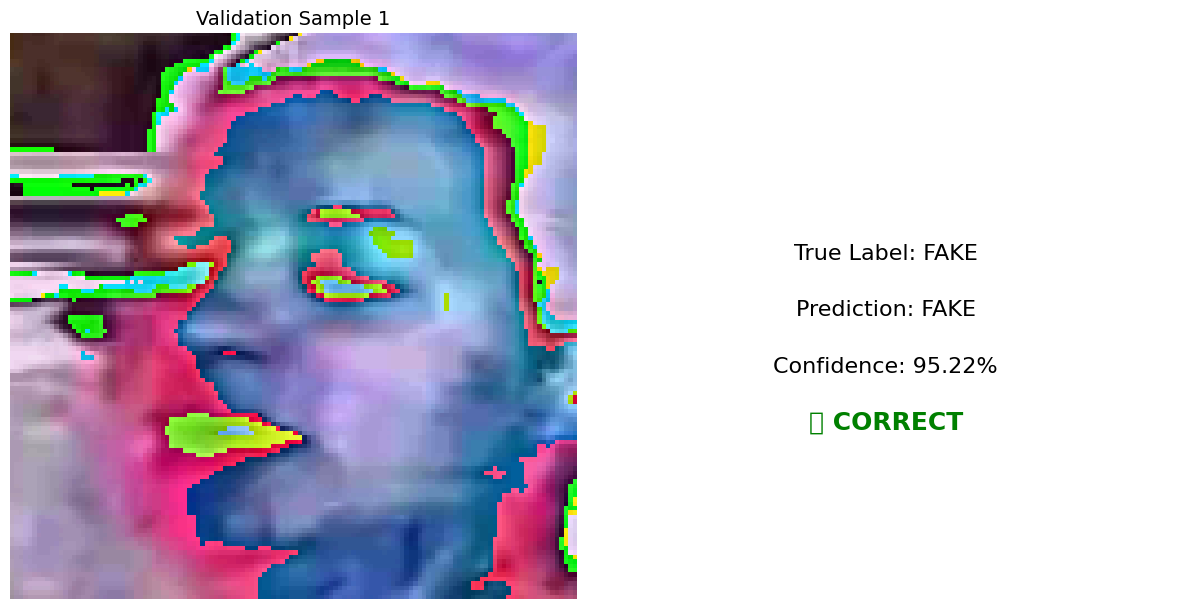

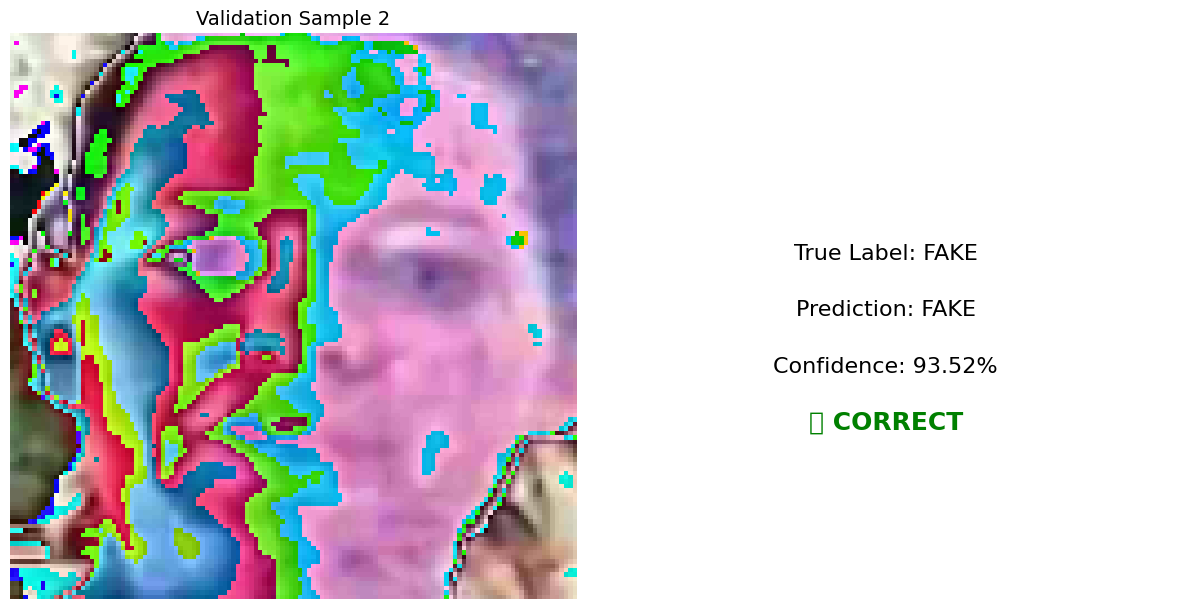

In [35]:
# --- Test Visualization on Sample Images ---
print("🎨 Testing Deepfake Detection Visualization")
print("=" * 50)

# Function to test on sample images from the dataset
def test_visualization_on_dataset_samples():
    """Test visualization on random samples from the dataset."""
    
    # Get random samples from train and validation datasets
    import random
    
    # Sample from training data
    train_samples = random.sample(range(len(train_dataset)), min(3, len(train_dataset)))
    val_samples = random.sample(range(len(val_dataset)), min(2, len(val_dataset)))
    
    print("📸 Testing on Training Dataset Samples:")
    print("-" * 40)
    
    for i, idx in enumerate(train_samples):
        face_sequence, label = train_dataset[idx]
        
        # Take the first frame for visualization
        first_frame = face_sequence[0]  # (3, H, W)
        
        # Convert to numpy and proper format
        frame_np = first_frame.permute(1, 2, 0).numpy()
        frame_np = (frame_np * 255).astype(np.uint8)
        
        # Get prediction
        prediction, confidence = visualizer.predict_single_face(first_frame)
        
        # Create visualization
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
        
        # Original face
        ax1.imshow(frame_np)
        ax1.set_title(f'Training Sample {i+1}', fontsize=14)
        ax1.axis('off')
        
        # Prediction result
        ax2.text(0.5, 0.6, f'True Label: {"REAL" if label == 0 else "FAKE"}', 
                fontsize=16, ha='center', transform=ax2.transAxes)
        ax2.text(0.5, 0.5, f'Prediction: {"REAL" if prediction == 0 else "FAKE"}', 
                fontsize=16, ha='center', transform=ax2.transAxes)
        ax2.text(0.5, 0.4, f'Confidence: {confidence:.2%}', 
                fontsize=16, ha='center', transform=ax2.transAxes)
        
        # Color code the result
        if prediction == label:
            color = 'green'
            result_text = '✅ CORRECT'
        else:
            color = 'red'
            result_text = '❌ INCORRECT'
        
        ax2.text(0.5, 0.3, result_text, 
                fontsize=18, ha='center', color=color, fontweight='bold', transform=ax2.transAxes)
        
        ax2.set_xlim(0, 1)
        ax2.set_ylim(0, 1)
        ax2.axis('off')
        
        plt.tight_layout()
        plt.show()
    
    print("\n📸 Testing on Validation Dataset Samples:")
    print("-" * 40)
    
    for i, idx in enumerate(val_samples):
        face_sequence, label = val_dataset[idx]
        
        # Take the first frame for visualization
        first_frame = face_sequence[0]
        
        # Convert to numpy and proper format
        frame_np = first_frame.permute(1, 2, 0).numpy()
        frame_np = (frame_np * 255).astype(np.uint8)
        
        # Get prediction
        prediction, confidence = visualizer.predict_single_face(first_frame)
        
        # Create visualization
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
        
        # Original face
        ax1.imshow(frame_np)
        ax1.set_title(f'Validation Sample {i+1}', fontsize=14)
        ax1.axis('off')
        
        # Prediction result
        ax2.text(0.5, 0.6, f'True Label: {"REAL" if label == 0 else "FAKE"}', 
                fontsize=16, ha='center', transform=ax2.transAxes)
        ax2.text(0.5, 0.5, f'Prediction: {"REAL" if prediction == 0 else "FAKE"}', 
                fontsize=16, ha='center', transform=ax2.transAxes)
        ax2.text(0.5, 0.4, f'Confidence: {confidence:.2%}', 
                fontsize=16, ha='center', transform=ax2.transAxes)
        
        # Color code the result
        if prediction == label:
            color = 'green'
            result_text = '✅ CORRECT'
        else:
            color = 'red'
            result_text = '❌ INCORRECT'
        
        ax2.text(0.5, 0.3, result_text, 
                fontsize=18, ha='center', color=color, fontweight='bold', transform=ax2.transAxes)
        
        ax2.set_xlim(0, 1)
        ax2.set_ylim(0, 1)
        ax2.axis('off')
        
        plt.tight_layout()
        plt.show()

# Run the test
test_visualization_on_dataset_samples()

In [41]:
# --- Interactive Video Analysis ---
print("🎬 Interactive Video Analysis")
print("=" * 40)

def analyze_video_interactive(video_path):
    """Analyze a video file interactively."""
    
    cap = cv2.VideoCapture(video_path)
    
    if not cap.isOpened():
        print(f"Error: Could not open video {video_path}")
        return
    
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    duration = total_frames / fps
    
    print(f"📹 Video Info:")
    print(f"   - Total frames: {total_frames}")
    print(f"   - FPS: {fps}")
    print(f"   - Duration: {duration:.2f} seconds")
    
    # Sample frames for analysis
    sample_frames = 10
    frame_indices = np.linspace(0, total_frames-1, sample_frames, dtype=int)
    
    results_summary = {
        'real_frames': 0,
        'fake_frames': 0,
        'no_face_frames': 0,
        'predictions': []
    }
    
    print(f"\n🔍 Analyzing {sample_frames} sample frames...")
    
    for i, frame_idx in enumerate(frame_indices):
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
        ret, frame = cap.read()
        
        if not ret:
            continue
        
        # Process frame
        frame_rgb, results = visualizer.visualize_video_frame(frame, frame_idx)
        
        if results:
            # Count predictions
            real_count = sum(1 for r in results if r['prediction'] == 'REAL')
            fake_count = sum(1 for r in results if r['prediction'] == 'FAKE')
            
            results_summary['real_frames'] += real_count
            results_summary['fake_frames'] += fake_count
            
            # Store detailed results
            results_summary['predictions'].append({
                'frame': frame_idx,
                'real_faces': real_count,
                'fake_faces': fake_count,
                'results': results
            })
        else:
            results_summary['no_face_frames'] += 1
    
    cap.release()
    
    # Display summary
    print(f"\n📊 Analysis Summary:")
    print(f"   - Frames with faces: {sample_frames - results_summary['no_face_frames']}")
    print(f"   - Frames without faces: {results_summary['no_face_frames']}")
    print(f"   - Total real predictions: {results_summary['real_frames']}")
    print(f"   - Total fake predictions: {results_summary['fake_frames']}")
    
    if results_summary['real_frames'] + results_summary['fake_frames'] > 0:
        real_percentage = results_summary['real_frames'] / (results_summary['real_frames'] + results_summary['fake_frames']) * 100
        fake_percentage = results_summary['fake_frames'] / (results_summary['real_frames'] + results_summary['fake_faces']) * 100
        
        print(f"   - Real percentage: {real_percentage:.1f}%")
        print(f"   - Fake percentage: {fake_percentage:.1f}%")
        
        # Overall assessment
        if fake_percentage > 70:
            assessment = "🔴 LIKELY FAKE VIDEO"
        elif fake_percentage > 30:
            assessment = "�� SUSPICIOUS VIDEO"
        else:
            assessment = "🟢 LIKELY REAL VIDEO"
        
        print(f"\n�� Overall Assessment: {assessment}")
    
    return results_summary

# Example usage (you can replace with your own video path)
print("�� To analyze a video, use:")
print("   analyze_video_interactive(/home/anuragyt4321/deep/image)")

🎬 Interactive Video Analysis
�� To analyze a video, use:
   analyze_video_interactive(/home/anuragyt4321/deep/image)


In [40]:
# --- Batch Image Analysis ---
print("🖼️ Batch Image Analysis")
print("=" * 30)

def analyze_image_folder(folder_path, output_folder=None):
    """Analyze all images in a folder for deepfake detection."""
    
    import os
    from pathlib import Path
    
    # Supported image extensions
    image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff']
    
    # Find all images in folder
    image_files = []
    for ext in image_extensions:
        image_files.extend(Path(folder_path).glob(f'*{ext}'))
        image_files.extend(Path(folder_path).glob(f'*{ext.upper()}'))
    
    if not image_files:
        print(f"No images found in {folder_path}")
        return
    
    print(f"Found {len(image_files)} images to analyze...")
    
    # Create output folder if specified
    if output_folder:
        os.makedirs(output_folder, exist_ok=True)
    
    results = []
    
    for i, image_path in enumerate(image_files):
        print(f"Processing {i+1}/{len(image_files)}: {image_path.name}")
        
        try:
            # Load and analyze image
            image = cv2.imread(str(image_path))
            if image is None:
                print(f"  ❌ Could not load {image_path.name}")
                continue
            
            # Convert to RGB
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            
            # Analyze image
            frame_rgb, face_results = visualizer.visualize_video_frame(image_rgb)
            
            # Store results
            image_result = {
                'filename': image_path.name,
                'faces_detected': len(face_results),
                'real_faces': sum(1 for r in face_results if r['prediction'] == 'REAL'),
                'fake_faces': sum(1 for r in face_results if r['prediction'] == 'FAKE'),
                'results': face_results
            }
            
            results.append(image_result)
            
            # Save visualization if output folder specified
            if output_folder:
                output_path = Path(output_folder) / f"analysis_{image_path.stem}.png"
                plt.savefig(str(output_path), dpi=300, bbox_inches='tight')
                plt.close()
            
        except Exception as e:
            print(f"  ❌ Error processing {image_path.name}: {e}")
    
    # Display summary
    print(f"\n📊 Batch Analysis Summary:")
    print(f"   - Images processed: {len(results)}")
    print(f"   - Total faces detected: {sum(r['faces_detected'] for r in results)}")
    print(f"   - Total real predictions: {sum(r['real_faces'] for r in results)}")
    print(f"   - Total fake predictions: {sum(r['fake_faces'] for r in results)}")
    
    return results

# Example usage
print("💡 To analyze a folder of images, use:")
print("   analyze_image_folder(/home/anuragyt4321/deep/image, 'output_folder')")

🖼️ Batch Image Analysis
💡 To analyze a folder of images, use:
   analyze_image_folder(/home/anuragyt4321/deep/image, 'output_folder')


In [39]:
# --- Real-time Webcam Analysis (Optional) ---
print("📹 Real-time Webcam Analysis")
print("=" * 35)

def real_time_analysis():
    """Real-time deepfake detection using webcam."""
    
    print("�� Starting real-time analysis...")
    print("Press 'q' to quit, 's' to save current frame")
    
    cap = cv2.VideoCapture(0)  # Use default webcam
    
    if not cap.isOpened():
        print("Error: Could not open webcam")
        return
    
    frame_count = 0
    
    while True:
        ret, frame = cap.read()
        
        if not ret:
            print("Error: Could not read frame")
            break
        
        # Process every 5th frame for performance
        if frame_count % 5 == 0:
            try:
                # Analyze frame
                frame_rgb, results = visualizer.visualize_video_frame(frame)
                
                # Convert back to BGR for display
                frame_display = cv2.cvtColor(frame_rgb, cv2.COLOR_RGB2BGR)
                
                # Add results overlay
                if results:
                    y_offset = 30
                    for i, result in enumerate(results):
                        text = f"Face {i+1}: {result['prediction']} ({result['confidence']:.1%})"
                        color = (0, 255, 0) if result['prediction'] == 'REAL' else (0, 0, 255)
                        cv2.putText(frame_display, text, (10, y_offset), 
                                  cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)
                        y_offset += 30
                
            except Exception as e:
                print(f"Error processing frame: {e}")
                frame_display = frame
        
        # Display frame
        cv2.imshow('Real-time Deepfake Detection', frame_display)
        
        # Handle key presses
        key = cv2.waitKey(1) & 0xFF
        if key == ord('q'):
            break
        elif key == ord('s'):
            # Save current frame
            cv2.imwrite(f'webcam_frame_{frame_count}.jpg', frame_display)
            print(f"Frame saved as webcam_frame_{frame_count}.jpg")
        
        frame_count += 1
    
    cap.release()
    cv2.destroyAllWindows()
    print("Real-time analysis stopped.")

# Uncomment to enable real-time analysis
real_time_analysis()

📹 Real-time Webcam Analysis
�� Starting real-time analysis...
Press 'q' to quit, 's' to save current frame
Error: Could not open webcam


[ WARN:0@28087.921] global cap_v4l.cpp:982 open VIDEOIO(V4L2:/dev/video0): can't open camera by index
[ERROR:0@28087.924] global obsensor_uvc_stream_channel.cpp:156 getStreamChannelGroup Camera index out of range
